In [1]:
import string

from collections import Counter

import matplotlib.pyplot as plt

from nltk.corpus import stopwords

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.stem import WordNetLemmatizer

from nltk.tokenize import word_tokenize

import nltk
#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import string
from collections import Counter

import matplotlib.pyplot as plt
import GetOldTweets3

In [3]:

def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#CoronavirusOutbreak') \
        .setSince("2020-02-01") \
        .setUntil("2020-04-01") \
        .setMaxTweets(5000)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [4]:
# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [5]:
# Print texts
text_tweets

[['Someone told #Trump that the optics of #golf during #CoronavirusOutbreak would look really really BAD'],
 [' What you focus on will expand. Stress, worry, fear &amp; fretting - all of the above deplete your immune system! #COVID19 #COVID2019 #coronavirus #CoronavirusOutbreak #CoronavirusPandemic #coronapocolypse #WashYourHands #HealthyFood #SocialDistancing'],
 ['I need a robot companion. I am NOT an introvert. Basement podcasts are nice but nothing replaces uninfected human touch. #CoronaProof #SocialDistancing #SocialDistancingNow #COVID19 #CoronavirusOutbreak #coronavirus #CoronaLockdown #CoronavirusPandemic #CoronaVirusChallenge'],
 ['Global #COVID19 cases: 854,912 confirmed (+525) 177,782 recovered (+116) 42,044 deaths (+25) 188,172 confirmed. 3,873 deaths (7,024 recovered) 8,527 confirmed. 101 deaths (1,592 recovered) #Coronavirus #CoronavirusUpdate #CoronavirusOutbreak #WuhanVirus #USA #Canada'],
 ['For a lighter moment amidst the #CoronavirusOutbreak #Malaysia &amp; #Singapo

In [6]:
# Removing Stop Words
final_words = []

for word in tokenized_words:
    if word not in stopwords.words('english'):
        final_words.append(word)

In [7]:
# Lemmatization - From plural to single + Base form of a word (example better-> good)

lemma_words = []

for word in final_words:
    word = WordNetLemmatizer().lemmatize(word)
    lemma_words.append(word)

In [8]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' fearful': 14, ' powerless': 13, ' attracted': 12, ' happy': 12, ' sad': 9, ' angry': 6, ' fearless': 5, ' attached': 5, ' adequate': 5, ' hated': 5, ' esteemed': 4, ' entitled': 4, ' free': 4, ' cheated': 3, ' singled out': 3, ' alone': 3, ' anxious': 3, ' loved': 3, ' independent': 2, ' average': 2, ' apathetic': 2, ' embarrassed': 2, ' focused': 2, ' bored': 1, ' safe': 1, ' surprise': 1, ' lost': 1, ' codependent': 1, ' obsessed': 1, ' derailed': 1, ' belittled': 1})


#### Polarity Classification for #CoronavirusOutbreak

In [16]:
sia = SentimentIntensityAnalyzer()

test_sent = '#CoronavirusOutbreak'


print (sia.polarity_scores(test_sent))

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [17]:
def sentiment_analyse(sentiment_text):
    
    score = SentimentIntensityAnalyzer().polarity_scores(sentiment_text)
    
    if score['neg'] > score['pos']:
        print("\n     ******Negative Sentiment*******")
        
    elif score['neg'] < score['pos']:
        print("\n     ******Positive Sentiment*******")
    else:
        print("Neutral Sentiment")


     ******Positive Sentiment*******


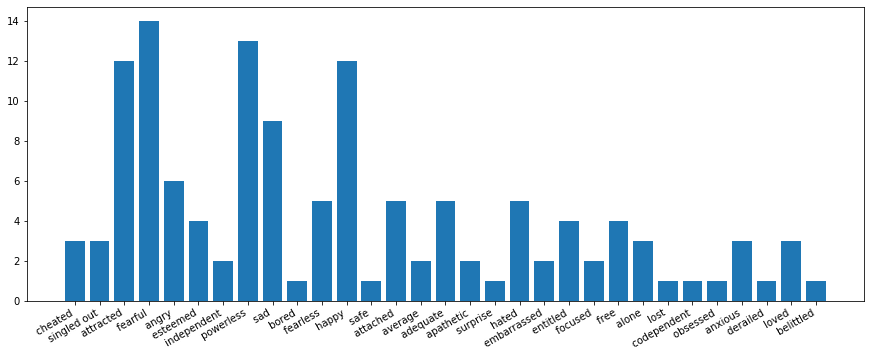

In [18]:
sentiment_analyse(cleaned_text)

fig, ax1 = plt.subplots(figsize = (15,6))
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

#### NOTE::Here fearful factor leads among other factors. Here there is an emotion of fearfulness developed among people when we compared the sentiment before and after COVID.

* Here we can also observe there is a senese of positiveness developed, it's mignt bedue to the lockdowm and people are doing their work form home. They get certain relaxtion in terms of spending time with their famillies.

* There is a sense of freeness, anxiousness, adeuateness and happiness developed among people. So in total we can say there is a sense of positiveness developed among people.

* Here also Corona Positive Can create an illusion of positive sentiments.

#### Bag of word approach in Count Vectorizer. Comparision of two sentences using Count Vectorizer .

In [26]:

from sklearn.feature_extraction.text import CountVectorizer 

from nltk.corpus import stopwords
import pandas as pd

# Single document (',' seperates each document)
string = ["Corona is a Dangerous Virus!"]

stop_words = stopwords.words('english')

# Removing Stopwords

vect1 = CountVectorizer(stop_words=stop_words)

vect1.fit_transform(string)
print("bag of words :",vect1.get_feature_names())

bag of words : ['corona', 'dangerous', 'virus']


In [27]:
vect1.vocabulary_

{'corona': 0, 'dangerous': 1, 'virus': 2}

In [28]:
c_vect = CountVectorizer(stop_words=stop_words)

c_vect.fit(string)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [29]:
string2 = ['The Dangerous Virus Corona can be Cured with Vaccination']

c_new_vect = c_vect.transform(string2)

print ("Text Present at ",c_new_vect.toarray())

print ("original indexes", vect1.get_feature_names() )

Text Present at  [[1 1 1]]
original indexes ['corona', 'dangerous', 'virus']


#### Getting the martrix using Bag of Words

In [30]:
# Using function
def text_matrix(message, countvect):
    terms_doc = countvect.fit_transform(message)
    return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())

In [31]:
message = ['Corona is a Dangerous Virus!', "The Dangerous Virus Corona can be Cured with Vaccination"]

c_vect = CountVectorizer()
print ("Below metrix is the Bag of Words approach")
text_matrix(message, c_vect)

Below metrix is the Bag of Words approach


,be,can,corona,cured,dangerous,is,the,vaccination,virus,with
0,0,0,1,0,1,1,0,0,1,0
1,1,1,1,1,1,0,1,1,1,1
